<a href="https://colab.research.google.com/github/Rahneesh/Costumer-Churn-Analysis/blob/main/Mini_Project_1_Telco_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Telco Costumer Churn
## 1. Imports

In [44]:
# Imports

import pandas as pd
import numpy as np

# Visualisation libraries
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns

# Preprocessing libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Model libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

# K fold and cross validator
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, KFold, RandomizedSearchCV, cross_val_score

# Performance evaluators
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, make_scorer

from sklearn.inspection import permutation_importance

# Saving the model
import pickle

## 2. EDA

### 2.1 Insight about the dataset

In [45]:
input_data=pd.read_csv('/content/drive/MyDrive/Entri - Data Science with Gen AI - Assignments/Mini project 1/Telco_Data.csv')
display(input_data.head())
display(input_data.describe())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


The dataset includes customer details and service usage information from a telecommunications provider. The key features are:


*   customerID – A unique ID assigned to each customer.
*   gender – The customer’s gender (Male/Female).
* SeniorCitizen – Identifies if the customer is a senior citizen (1 = Yes, 0 = No).
* Partner – Shows whether the customer has a partner (Yes/No).
* Dependents – Indicates if the customer has dependents (Yes/No).
* tenure – The number of months the customer has been with the company.
* PhoneService – Specifies if the customer has phone service (Yes/No).
* MultipleLines – Indicates whether multiple phone lines are subscribed (Yes/No/No phone service).
* InternetService – Type of internet connection used (DSL, Fiber optic, No).
* OnlineSecurity – Whether the customer has online security (Yes/No/No internet service).
* OnlineBackup – Shows if the customer uses online backup services (Yes/No/No internet service).
* DeviceProtection – Indicates if device protection is activated (Yes/No/No internet service).
* TechSupport – Shows whether the customer has tech support service (Yes/No/No internet service).
* StreamingTV – Indicates if TV streaming is used (Yes/No/No internet service).
* StreamingMovies – Indicates if movie streaming is used (Yes/No/No internet service).
* Contract – Contract type (Month-to-month, One year, Two year).
* PaperlessBilling – Whether billing is paperless (Yes/No).
* PaymentMethod – Customer’s payment method (Electronic check, Mailed check, Bank transfer, Credit card).
* MonthlyCharges – Monthly billing amount.
* TotalCharges – Total charges incurred during the customer’s tenure.
* Churn – Shows whether the customer has discontinued the service (Yes/No).



### 2.2 Handling missing values & duplicate values

In [46]:
print("Missing values before handling:")
print(input_data.isnull().sum())

Missing values before handling:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [47]:
display(input_data.info())
input_data = input_data.drop_duplicates()
input_data = input_data.reset_index(drop=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


None

In [48]:
# TotalCharges should not be object.

input_data['TotalCharges'] = pd.to_numeric(input_data['TotalCharges'], errors='coerce')
print("\nMissing values after converting TotalCharges:")
print(input_data.isnull().sum())

input_data.dropna(inplace=True)
print("\nMissing values after dropping rows:")
print(input_data.isnull().sum())


Missing values after converting TotalCharges:
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Missing values after dropping rows:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
To

### 2.3 Countplot for categorical values

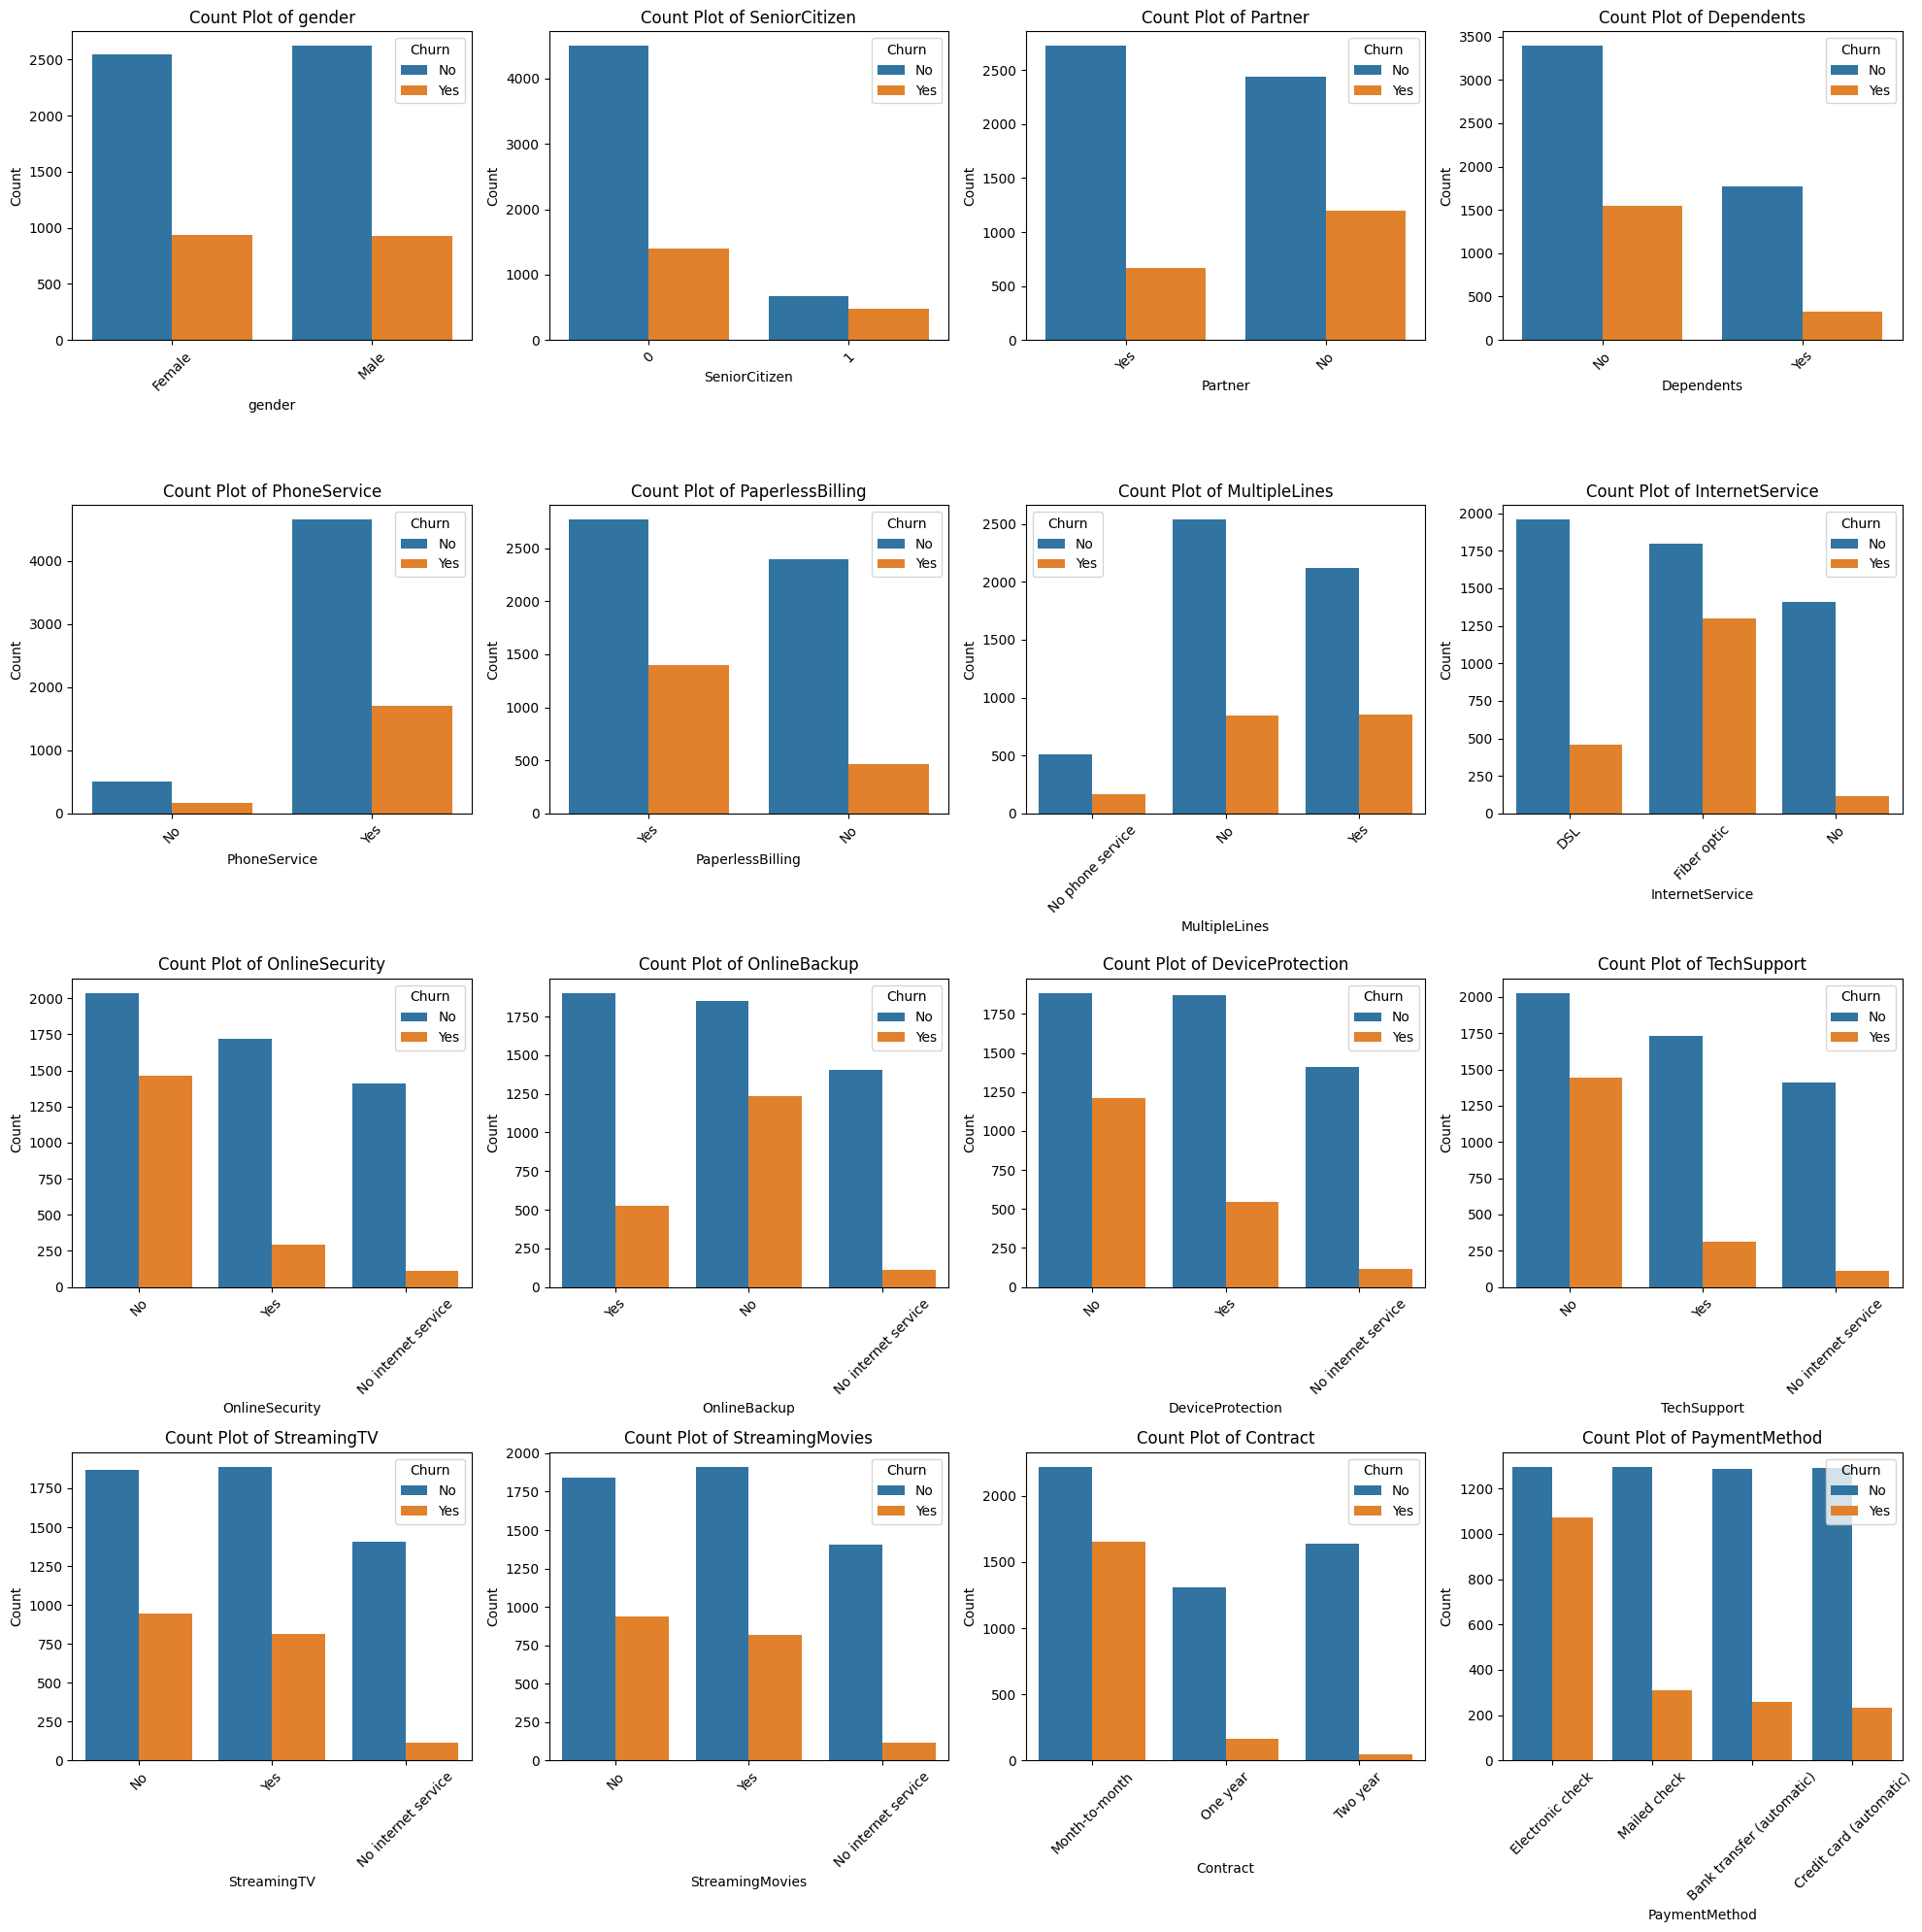

In [49]:
# Count plot for all the categorical columns

cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
        'PaperlessBilling', 'MultipleLines', 'InternetService','OnlineSecurity',
        'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
        'StreamingMovies', 'Contract', 'PaymentMethod']

plt.figure(figsize=(20, 20))   # larger figure for 16 plots

for i, col in enumerate(cols):
    plt.subplot(4, 4, i + 1)   # 4x4 layout for 16 graphs
    sns.countplot(data=input_data, x=col, hue='Churn')
    plt.title(f'Count Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### 2.4 Count of customer churn

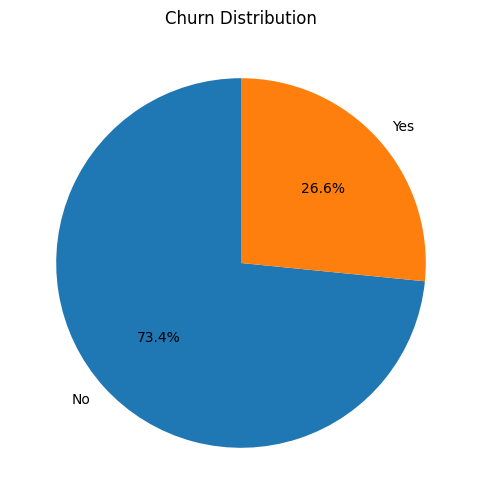

In [50]:
churn_counts = input_data['Churn'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(
    churn_counts,
    labels=churn_counts.index,
    autopct='%1.1f%%',
    startangle=90
)

plt.title("Churn Distribution")
plt.show()


### 2.5 Heat Map

In [51]:
# Encoding before appling heat map
# Taking unique value to understand the encoding required for each coulmn.
print(input_data.columns)
for col in input_data:
    print(input_data[col].unique())

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
['Female' 'Male']
[0 1]
['Yes' 'No']
['No' 'Yes']
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
['No' 'Yes']
['No phone service' 'No' 'Yes']
['DSL' 'Fiber optic' 'No']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No i

In [52]:
# Making a copy of original data set
input_data_1=input_data.copy()

# Droping costumer ID - Its does not contain any value for analysis
input_data_1.drop(columns=['customerID'],inplace=True)

# Apply label encoding
# # Label encoding all the binary classes
cols_to_encode = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
                  'PaperlessBilling', 'Churn']
le = LabelEncoder()

for col in cols_to_encode:
    input_data_1[col] = le.fit_transform(input_data_1[col])

# Apply one hot encoding
cols_to_encode = ['MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup',
                  'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                  'PaymentMethod']

input_data_1 = pd.get_dummies(input_data_1, columns=cols_to_encode, drop_first=True, dtype=int)

input_data_1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,0,0,0,0,0,1,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,0,1,0,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,0,0,0,0,0,0,0,0,1,0


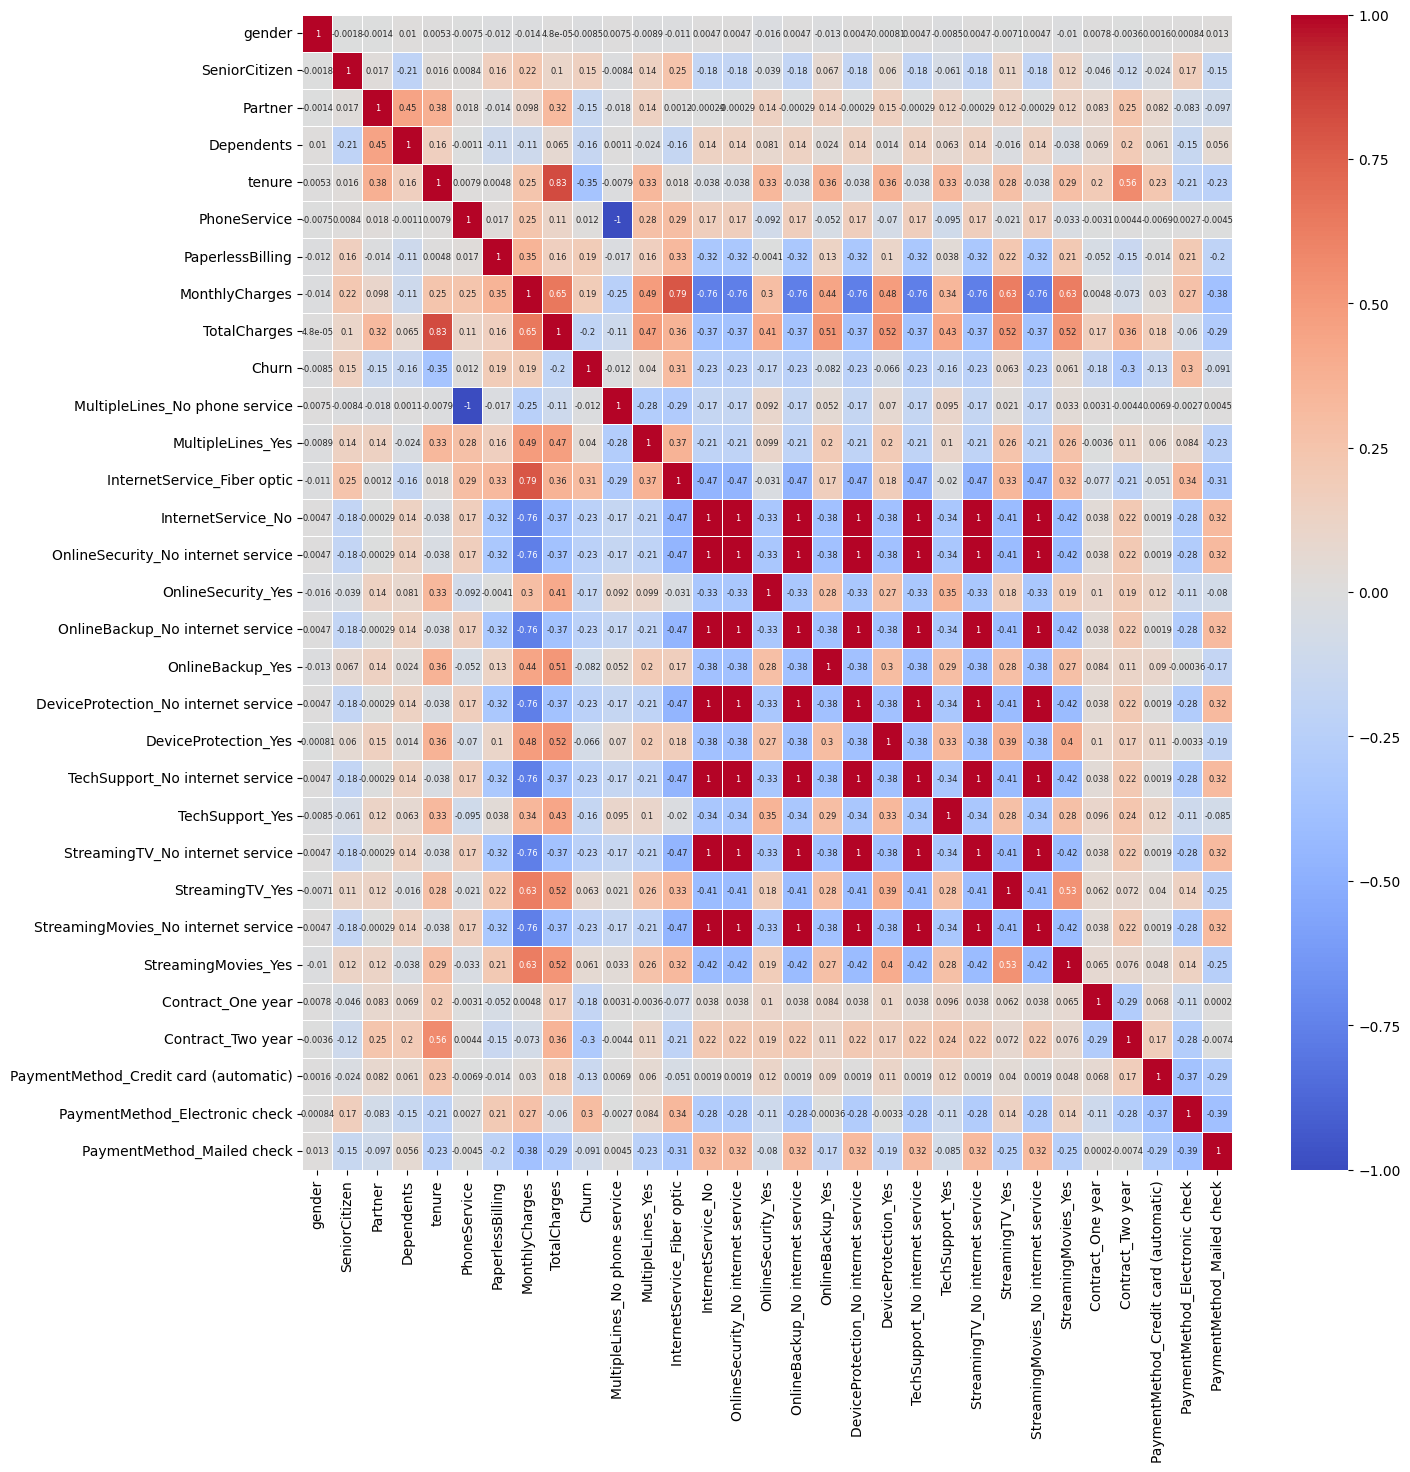

In [53]:
# Corulation matrix
corr_matrix = input_data_1.select_dtypes(include=['number']).corr()

plt.figure(figsize=(15,15))
sns.heatmap(corr_matrix, annot=True, annot_kws={"size": 6}, cmap='coolwarm', linewidths=0.5)
plt.show()

### 2.6 Distribution curve for numerical columns

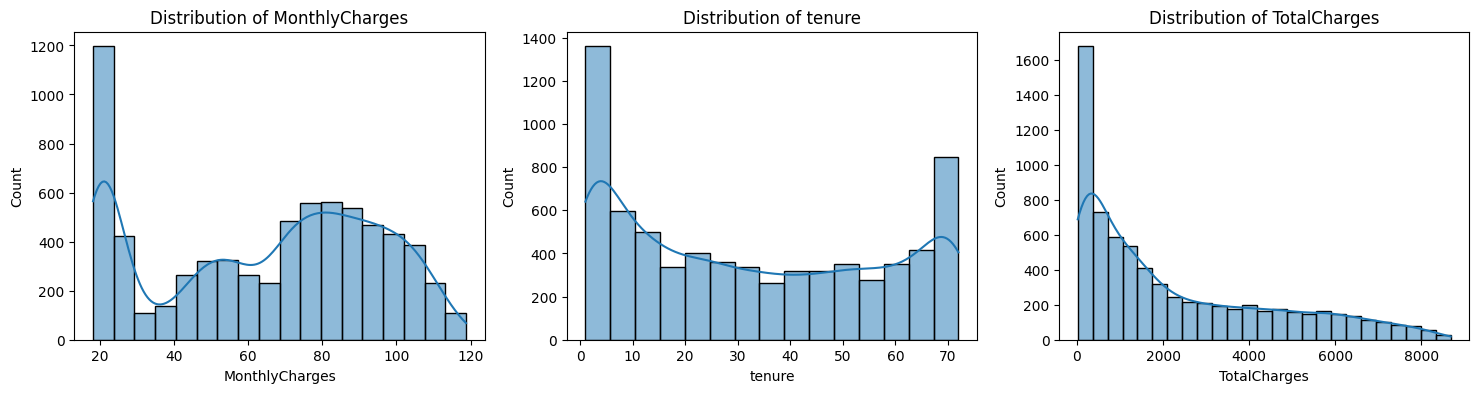

In [54]:
# Distribution of monthly charge, total charge and tenure -- We need to understand these data as well.

cols = ['MonthlyCharges', 'tenure', 'TotalCharges']

plt.figure(figsize=(18, 4))

for i, col in enumerate(cols):
    plt.subplot(1, 3, i + 1)
    sns.histplot(input_data_1[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')


### 2.8 Outlier analysis


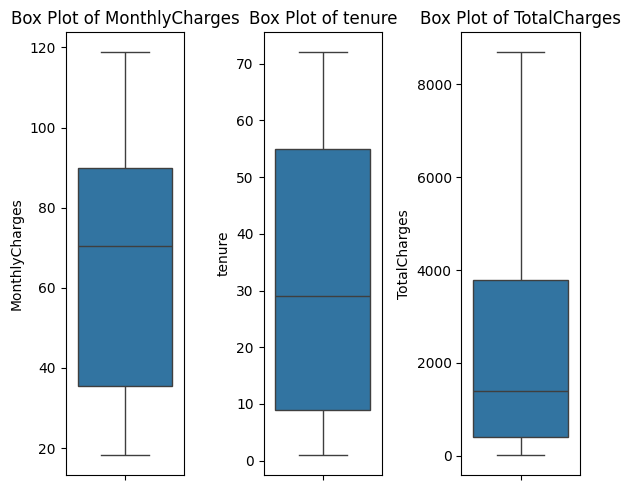

In [55]:
cols = ['MonthlyCharges', 'tenure', 'TotalCharges']  # your numeric columns

plt.figure(figsize=(6, 5))  # width, height

for i, col in enumerate(cols):
    plt.subplot(1, 3, i + 1)       # 1 row, 3 box plots
    sns.boxplot(y=input_data_1[col])         # boxplot for each column
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

No outliers which needs to be removed.

In [56]:
input_data_1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,0,0,0,0,0,1,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,0,1,0,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,0,0,0,0,0,0,0,0,1,0


### 2.8 EDA Summary


> There are around 7000 data

> Missing Values: 11 Missing values in the Total charges

> Churn rate = 26%

> Churning is high for the following categories:

*   Those who have fiber optics
*   Thos who dont have internet security
* Those who dont have online backup
* Those who didnt take take any device protection
* Those who are paying on month-to-month basis via eletronic cheque


>   Numeric Features: Tenure has two peak, Monthly charges and total charges are right skewed


## 3. Model building
### 3.1 Splitting the data into train-test and client data

In [57]:
# Dividing the data set into two parts. One for model building and testing other for final testing.

input_data_model, input_data_client = train_test_split(input_data_1, test_size=0.10, random_state=42)

### 3.2 Models

3.2.1 XG Boost

In [58]:
X=input_data_model.drop('Churn', axis=1)
y=input_data_model['Churn']

# -----------------------------------
# Model: XGBoost
# -----------------------------------
xgb_model = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

xgb_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 5],
    'min_child_weight': [1, 3, 5]
}

cv = KFold(n_splits=5, shuffle=True, random_state=42)

xgb_grid = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=xgb_params,
    n_iter=20,
    scoring='f1',
    cv=cv,
    random_state=42,
    n_jobs=-1,
    verbose=2
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

xgb_grid.fit(X_train, y_train)

best_model_1 = xgb_grid.best_estimator_

y_pred = best_model_1.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Test Precision:", precision_score(y_test, y_pred))
print("Test Recall:", recall_score(y_test, y_pred))
print("Test F1:", f1_score(y_test, y_pred))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Test Accuracy: 0.811216429699842
Test Precision: 0.6909722222222222
Test Recall: 0.5702005730659025
Test F1: 0.6248037676609105


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [17:29:52] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


3.2.2 Random Forest

In [59]:
# -----------------------------------
# RANDOM FOREST + RANDOMIZED SEARCH
# -----------------------------------
rf_model = RandomForestClassifier(random_state=42)

rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [5, None],
    'min_samples_split': [2, 10],
    'max_features': ['sqrt', 'log2'],
    'class_weight': ['balanced'],
    'bootstrap': [True, False],
    'min_samples_leaf': [1, 2, 4]
}

cv = KFold(n_splits=5, shuffle=True, random_state=42)

# MULTIPLE SCORING METRICS
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}

rf_grid = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=rf_params,
    n_iter=20,
    scoring=scoring,
    refit='f1',        # choose best model using F1-score
    cv=cv,
    n_jobs=-1,
    verbose=2,
    random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

rf_grid.fit(X_train, y_train)

best_index = rf_grid.best_index_
best_model_2 = rf_grid.best_estimator_

y_pred = best_model_2.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Test Precision:", precision_score(y_test, y_pred))
print("Test Recall:", recall_score(y_test, y_pred))
print("Test F1:", f1_score(y_test, y_pred))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Test Accuracy: 0.7503949447077409
Test Precision: 0.5326732673267327
Test Recall: 0.7707736389684814
Test F1: 0.629976580796253


3.2.3 Gradient Boosting Classifier

In [60]:
# ----------------------------------------
# Model: Gradient Boosting Classifier
# ----------------------------------------

gb_model = GradientBoostingClassifier(random_state=42)

gb_params = {
    'n_estimators': [100, 150, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [2, 3, 4],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.6, 0.8, 1.0],
    'max_features': ['sqrt', 'log2', None]
}

cv = KFold(n_splits=5, shuffle=True, random_state=42)

gb_grid = RandomizedSearchCV(
    estimator=gb_model,
    param_distributions=gb_params,
    n_iter=20,
    scoring='f1',
    cv=cv,
    random_state=42,
    n_jobs=-1,
    verbose=2
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

gb_grid.fit(X_train, y_train)
best_model_3 = gb_grid.best_estimator_

y_pred = best_model_3.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Test Precision:", precision_score(y_test, y_pred))
print("Test Recall:", recall_score(y_test, y_pred))
print("Test F1:", f1_score(y_test, y_pred))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Test Accuracy: 0.80173775671406
Test Precision: 0.677536231884058
Test Recall: 0.5358166189111748
Test F1: 0.5984


####  XGBoost performed slightly better than other classification models.

In [61]:
# Saving the model
# Path inside Google Drive
path = "/content/drive/MyDrive/Entri - Data Science with Gen AI - Assignments/Mini project 1/best_model.pkl"
with open(path, "wb") as f:
    pickle.dump(best_model_1, f)
print("Model saved to Google Drive!")

Model saved to Google Drive!


In [62]:
# Loading the model
with open(path, "rb") as f:
    loaded_model = pickle.load(f)

print("Model loaded successfully!")

Model loaded successfully!


In [63]:
input_data_client

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2481,1,1,1,0,61,1,0,25.00,1501.75,0,...,0,1,0,1,0,0,1,0,0,0
6784,0,0,0,0,19,1,0,24.70,465.85,0,...,0,1,0,1,0,0,0,0,0,0
6125,1,0,1,0,13,1,1,102.25,1359.00,1,...,0,0,1,0,1,0,0,1,0,0
3052,1,0,1,0,37,1,1,55.05,2030.75,0,...,0,0,0,0,0,0,0,0,0,1
4099,0,0,0,0,6,0,0,29.45,161.45,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5588,1,0,0,0,1,1,1,49.65,49.65,1,...,0,0,0,0,0,0,0,0,0,1
1398,0,0,0,0,24,1,1,84.35,1938.05,0,...,1,0,0,0,0,0,0,0,1,0
198,1,0,1,1,72,1,1,112.25,8041.65,0,...,1,0,1,0,1,0,1,0,0,0
4168,1,0,1,0,61,0,1,62.15,3778.85,0,...,1,0,1,0,1,0,1,0,0,1


In [64]:
X = input_data_client.drop('Churn', axis=1)
y_pred = loaded_model.predict(X)
input_data_client['Predicted_Churn'] = y_pred
print(input_data_client['Predicted_Churn'].value_counts())

Predicted_Churn
0    560
1    144
Name: count, dtype: int64


### In the client data, the costumer churn probability has identified.